<img src="http://www.exalumnos.usm.cl/wp-content/uploads/2015/06/Isotipo-Negro.gif" title="Title text" width="20%" height="20%" />


<hr style="height:2px;border:none"/>
<h1 align='center'> INF-393 Máquinas de Aprendizaje II-2018 </h1>

<H3 align='center'> Tarea 3 - Ensamblados y modelos avanzados </H3>
<hr style="height:2px;border:none"/>

**Temas**  
* Técnicas de ensamblado: *bagging*, *boosting*, *random forest*.
* Redes Neuronales Convolucionales vs *Feed Forward*
* Aprendizaje no supervisado: *hidden models*
* Aprendizaje sobre secuencias

**Intengrantes**
* César Quiroz Mansilla
* Jorge Contreras Cabreras
 

## 1. Calidad de un vino

Existen muchas variedades de vino existentes debido a los distintos gustos que tienen las personas. Del gusto se desprende la calidad que una persona le podría asignar a un vino, el cual proviene del gusto de la persona en particular, o bien, a la gran cantidad de quı́micos y procesos que se aplican a la producción de vino. Para el área de negocios, el estimar cuál es la calidad de un vino en base a la apreciación del público es una tarea bastante difı́cil.  
Para esta actividad se trabajará con dos *datasets* asociados a las variantes tinto y blanco del vino portugués
”Vinho Verde”. Debido a temas privados solo se cuenta con las caracterı́stcas fisioquı́micas asociadas a un
vino en particular, los cuales corresponden a 11 atributos numéricos descritos en el siguiente __[link](http://archive.ics.uci.edu/ml/machine-learning-databases/wine-quality/winequality.names)__.

Este problema puede ser abordado como clasificación de 11 clases o de regresión, ya que el atributo a estimar,
*quality*, tiene un dominio como valor entero 0 y 10. La forma de resolverlo será a través de **ensamblados**.

<img src="https://uploads.toptal.io/blog/image/92064/toptal-blog-image-1454584112948-fc1d35939aa1886bf30c816b3ac20e21.jpg" title="Title text" width="20%"  />


#### a) Carge los dos dataset en un único dataframe de pandas, además de agregar una columna indicando si es vino tinto o blanco. Describa el dataset a trabajar.


In [1]:
import pandas as pd
df_red = pd.read_csv("winequality-red.csv",sep=";") #Vinos tintos
print("Cantidad de Vinos Tintos",len(df_red))
df_red.loc[:,'Tipo'] = 1
df_white = pd.read_csv("winequality-white.csv",sep=";") #Vinos blanco
print("Cantidad de Vinos Blancos",len(df_white))
df_white.loc[:,'Tipo'] = 2
df = pd.concat([df_red,df_white], axis=0)
print("Cantidad total de ejemplos", len(df))
df.head()

Cantidad de Vinos Tintos 1599
Cantidad de Vinos Blancos 4898
Cantidad total de ejemplos 6497


,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,Tipo
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,1
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5,1
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5,1
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6,1
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,1


Variables de entrada (basadas en pruebas fisicoquímicas):

1. acidez fija 
2. acidez volátil 
3. ácido cítrico 
4. azúcar residual 
5. cloruros 
6. dióxido de azufre libre 
7. dióxido de azufre total 
8. densidad 
9. pH 
10. sulfatos 
11. alcohol 
12. Tipo

Variable de salida (basada en datos sensoriales): 
13. calidad (puntuación entre 0 y 10)

#### b) Aborde este problema como si fuera de clasificación con multiples clases para predecir el valor de calidad de un vino, es decir, utilice las distintas caracterı́sticas fisioquı́micas presentes en los datos para estimar la etiqueta ¿Cuántas clases son y cuántos ejemplos hay por clase? ¿Qué sucede con predecir si un vino tiene calidad mínima (0) o máxima(10)? Además para el propósito académico de esta actividad cree un conjunto de pruebas (20%)  para evaluar la generalización final del modelo y otro de validación (20%) si estima conveniente. 

In [2]:
print("valores de variable calidad \n", df.quality.value_counts())
df = df.sample(frac=1,random_state=44) #Desordena los datos
#Conjunto de entrenamiento y validacion 1300 ejemplos cada uno (20%)
df_train = df.iloc[:-2600]  #todo el conjunto menos los ultimos 2600
print("Cantidad ejemplos conjunto entrenamiento: ",len(df_train))
df = df.iloc[-2600:]    #ultimos 2600 valores del conjunto
df_test = df.iloc[:-1300] #todo el conjunto menos los ultimos 1300
df_val = df.iloc[-1300:]  #ultimos 1300 valores del conjunto
print("Cantidad ejemplos conjunto validación: ",len(df_val))
print("Cantidad ejemplos conjunto pruebas: ",len(df_test))

valores de variable calidad 
 6    2836
5    2138
7    1079
4     216
8     193
3      30
9       5
Name: quality, dtype: int64
Cantidad ejemplos conjunto entrenamiento:  3897
Cantidad ejemplos conjunto validación:  1300
Cantidad ejemplos conjunto pruebas:  1300


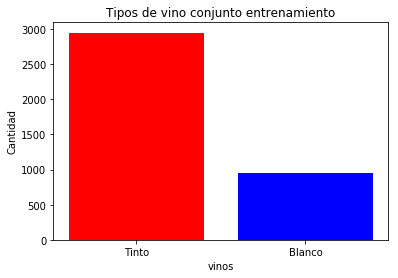

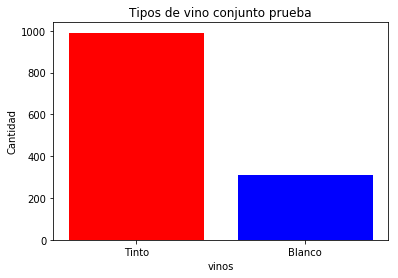

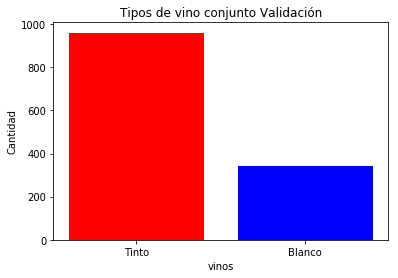

In [4]:
#Verificar si la cantidad de vinos esta bien distribuida.
import matplotlib.pyplot as plt
import numpy as np
import warnings
import matplotlib.cbook
warnings.filterwarnings("ignore",category=matplotlib.cbook.mplDeprecation)
#Conjunro entretamiento
eje_x=["Tinto","Blanco"]
X = np.arange(2)
plt.bar(X,df_train.Tipo.value_counts(), align='center',color=["r","b"])
ax =plt.axes()
ax.set_xticks(X)
ax.set_xticklabels(eje_x)
plt.title("Tipos de vino conjunto entrenamiento") #titulo
plt.xlabel('vinos') #Nombre eje x
plt.ylabel('Cantidad') #Nombre eje y
plt.show()
#Conjunto prueba
plt.bar(X,df_test.Tipo.value_counts(), align='center',color=["r","b"])
ax =plt.axes()
ax.set_xticks(X)
ax.set_xticklabels(eje_x)
plt.title("Tipos de vino conjunto prueba") #titulo
plt.xlabel('vinos') #Nombre eje x
plt.ylabel('Cantidad') #Nombre eje y
plt.show()
#Conjunto de validación
plt.bar(X,df_val.Tipo.value_counts(), align='center',color=["r","b"])
ax =plt.axes()
ax.set_xticks(X)
ax.set_xticklabels(eje_x)
plt.title("Tipos de vino conjunto Validación") #titulo
plt.xlabel('vinos') #Nombre eje x
plt.ylabel('Cantidad') #Nombre eje y
plt.show()

In [5]:
#Creacion conjuntos
Y_train = df_train['quality'].values  #Variable de salida entrenamiento
Y_val = df_val['quality'].values  #Variable de salida validacion
Y_test = df_test['quality'].values  #Variable de salida test
X_train = df_train.drop(["quality"],axis=1).values #Variable de entrada entrenamiento
X_val = df_val.drop(["quality"],axis=1).values #Variable de entrada validacion
X_test = df_test.drop(["quality"],axis=1).values #Variable de entrada test

#### c) Entrene un solo Árbol de Clasificación de múltiples niveles para resolver el problema. Defina un Árbol **no regularizado** (como el que no tiene límites en su profundidad) y otro Árbol **regularizado** (variando los hiper-parámetros que prefiera, por ejemplo, los más comunes como la profundidad, el número mínimo de datos para realizar *split* o el número mínimo de datos en cada hoja), recuerde que las **decisiones** no pueden ser basadas mirando el conjunto de pruebas. Debido al desbalanceo que se produce en las clases mida la métrica F1-score [[2]](#refs) sobre el conjunto de entrenamiento y de pruebas.

In [6]:
from ipywidgets import interactive
from sklearn.tree import DecisionTreeClassifier as Tree

print("Resultados arbol no regularizado modificando la profundidad")


model= Tree()
model.set_params(criterion='gini',splitter='best')
model.fit(X_train,Y_train)
print("Validation Accuracy: ",model.score(X_val,Y_val))
print("Train Accuracy: ",model.score(X_train,Y_train),"\n")



#Arbol regularizado
print("Resultados arbol regularizado modificando la profundidad")
def visualize_border_interactive(param):
    model = train_model(param)

def train_model(param):
    model= Tree()
    model.set_params(max_depth=param,criterion='gini',splitter='best')
    model.fit(X_train,Y_train)
    print("Validation Accuracy: ",model.score(X_val,Y_val))
    print("Train Accuracy: ",model.score(X_train,Y_train))
    return model

#Profundidad
p_min = 1
p_max = 35 
interactive(visualize_border_interactive,param=(p_min,p_max))

Resultados arbol no regularizado modificando la profundidad
Validation Accuracy:  0.5723076923076923
Train Accuracy:  1.0 

Resultados arbol regularizado modificando la profundidad


interactive(children=(IntSlider(value=18, description='param', max=35, min=1), Output()), _dom_classes=('widge…

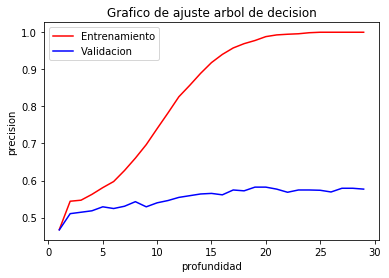

In [8]:
# Grafico de ajuste del árbol de decisión
train_prec =  []
eval_prec = []
max_deep_list = list(range(1, 30))

for deep in max_deep_list:
    model= Tree()
    model.set_params(max_depth=deep,criterion='gini',splitter='best') #se probo con entropy y se llego a lo mismo
    model.fit(X_train,Y_train)
    train_prec.append(model.score(X_train,Y_train))
    eval_prec.append(model.score(X_val,Y_val))

# graficar los resultados.
plt.plot(max_deep_list, train_prec, color='r', label='Entrenamiento')
plt.plot(max_deep_list, eval_prec, color='b', label='Validacion')
plt.title('Grafico de ajuste arbol de decision')
plt.legend()
plt.ylabel('precision')
plt.xlabel('profundidad')
plt.show()

+ Calcule la puntuación F1, también conocida como puntuación F equilibrada o medida F
+ El puntaje de F1 se puede interpretar como un promedio ponderado de la precisión y el recuerdo, donde un puntaje de F1 alcanza su mejor valor con 1 y el peor puntaje con 0. La contribución relativa de la precisión y el recuerdo al puntaje de F1 son iguales. La fórmula para el puntaje de F1 es:
+ F1  =  2  *  ( precisión  *  recuperación )  /  ( precisión  +  recuperación )
+ En el caso de clases múltiples y etiquetas múltiples, este es el promedio de la puntuación de F1 de cada clase con ponderación según el average parámetro.
+ Valores que se le puede dar a average:

'binary': Solo informe los resultados para la clase especificada por pos_label. Esto es aplicable solo si los objetivos ( y_{true,pred}) son binarios.

'micro': Calcule las métricas globalmente contando el total de verdaderos positivos, falsos negativos y falsos positivos.

'macro': Calcule las métricas para cada etiqueta y encuentre su media no ponderada. Esto no tiene en cuenta el desequilibrio de la etiqueta.

'weighted': Calcule las métricas para cada etiqueta y encuentre su ponderación promedio por soporte (el número de instancias reales para cada etiqueta). Esto altera 'macro' para tener en cuenta el desequilibrio de la etiqueta; puede dar lugar a una puntuación F que no se encuentra entre la precisión y la recuperación.

'samples': Calcule las métricas para cada instancia y encuentre su promedio (solo significativo para la clasificación de varias capas en la que difiere accuracy_score).

#### d) Entrene un ensamblado de árboles de múltiples niveles, mediante la técnica de **Bagging**, compare el Árbol **no regularizado** con el **regularizado** (*seteando los hiper-parámetros en base a lo experimentado anteriormente en c)*) ¿Qué debería suceder? ¿Se visualiza *overfitting*? Varíe la cantidad de árboles de decisión utilizados en el ensamblado (*n estimators*), realice un gráfico resumen del F1-score de entrenamiento y de pruebas en función de este hiper-parámetro.

In [10]:
from numpy.core.umath_tests import inner1d
from sklearn.ensemble import BaggingClassifier
model = BaggingClassifier(base_estimator=Tree(max_depth=10), n_estimators=100, n_jobs=-1)
model.fit(X_train,Y_train)

from sklearn.metrics import f1_score
y_pred=model.predict(X_val)

f1_score(Y_val, y_pred,average='micro')

0.6276923076923077

#### e) Entrene un ensamblado de árboles de múltiples niveles, mediante la técnica de **AdaBoost**, compare el Árbol **no regularizado** con el **regularizado** (*seteando los hiper-parámetros en base a lo experimentado anteriormente en c)* ¿Se visualiza *overfitting*? ¿Qué técnica se utiliza, *re-muestrear* o *pesar* ejemplos? ¿Qué le parece más sensato?. Varíe la cantidad de árboles de decisión utilizados en el ensamblado (*n estimators*), realice un gráfico resumen del F1-score de entrenamiento y de pruebas en función de este hiper-parámetro. Compare y analice con la técnica utilizada en d).

In [11]:
from sklearn.ensemble import AdaBoostClassifier
model = AdaBoostClassifier(base_estimator=Tree(max_depth=10), n_estimators=100)
model.fit(X_train,Y_train)
y_pred=model.predict(X_val)
f1_score(Y_val, y_pred,average='micro')

0.6615384615384615

#### f) Pruebe otra técnica de ensamblado dedicada a árboles de decisión, que combina el muestreo *boostrap* de *Bagging* con muestreo sobre las *features*: **Random Forest**, compare el Árbol **no regularizado** con el **regularizado** ¿Se visualiza *overfitting*?. Varíe la cantidad de árboles de decisión utilizados en el ensamblado (*n estimators*), realice un gráfico resumen el F1-score de entrenamiento y de pruebas en función de este hiper-parámetro.

In [13]:
from sklearn.ensemble import RandomForestClassifier
model = RandomForestClassifier(n_estimators=100, max_depth=15,n_jobs=-1,oob_score = True)
model.fit(X_train,Y_train)
y_pred=model.predict(X_val)
f1_score(Y_val, y_pred,average='micro')

0.666923076923077

#### g) Verifique que el **OOB error** (*out of bag error*) de los ensambladores que utilizan la técnica *boostrap* puede ser una alternativa como métrica de generalización, compárelo con el error calculado sobre el conjunto de pruebas y validación (o en su defecto *cross validation*).

In [14]:
oob_error = 1 - model.oob_score_
test_error = 1- model.score(X_test,Y_test)
val_error = 1- model.score(X_val,Y_val)
print("OOB error: ",oob_error)
print ("Val error: ",val_error)
print("Test error: ",test_error)

OOB error:  0.33846548627149087
Val error:  0.33307692307692305
Test error:  0.3523076923076923


#### h) Entrene alguna otra máquina de aprendizaje, elegida por usted de entre todas las vistas en el curso, para resolver el problema. Elija los hiper-parámetros que estime convenientes intentando aumentar el *F1-scor*e obtenido por los algoritmos anteriores ¿Se logra una mejora? ¿Por qué?

#### i) Compare y analice las distintas maneras con las que se resolvió el problema definido en b), por ejemplo incluya las decisiones que conlleva y los resultados que reflejan.

#### j) Defina otra forma de combinar los valores que entregan los ensamblados al hacer predicciones y compare con lo que se hace actualmente, por ejemplo *Bagging* realiza el voto de la mayoría para clasificación y promedio para regresión, *AdaBoost* realiza una combinación ponderada de cada clasificador dependiendo de su *habilidad* (desempeño para clasificar el conjunto de entrenamiento).

In [ ]:
def combine_predictions(predictions):
    return #define !
list_estimators = model.estimators_
list_predictions = [estimator.predict(X_test) for estimator in list_estimators]
new_predictions = combine_predictions(list_predictions)
...#measure f1 score
f1_score(y_test, new_predictions)

#### k) Utilice la técnica de ensamblado para seleccionar características, para ésto defina un criterio para estimar la importancia de los distintos atributos en el ensamblado, impleméntelo sobre alguno de los ensambladores entrenados para resolver el problema definido en b). Realice un *ranking* de importancia de atributos y seleccione las $k$ características más relevantes.

##### l) Entrene la máquina de aprendizaje definida en h) sobre las $k$ carecterísticas derivadas del punto anterior ¿Mejora los resultados sobre ésta máquina de aprendizaje?

<a id="segundo"></a>
## 2. Redes Convolucionales sobre imágenes
---
Las redes neuronales hoy en día han sido extendidas a numerosas aplicaciones gracias a la arquitectura definida para cada tipo de problema. Las redes neuronales que aplican la operación de convolución [[3]](#refs) o convoluciones en sus capas son concidas como *CNN* o *ConvNets*, lo cual se especializa en trabajar en datos con forma matricial (ya sea bi-dimensional o tri-dimensional), lo cual se adecúa perfectamente a imágenes (matrices), ya que gracias a su conectividad local se especializan en reconocer patrones sobre los datos de manera espacial, como refleja la siguiente imagen:

<img src="https://cdn-images-1.medium.com/max/1600/1*N4h1SgwbWNmtrRhszM9EJg.png" title="Title text" width="90%" />


En esta actividad trabajará con un extracto bastante pequeño del dataset conocido como **101-Food**[[4]](#refs), el cual consta de mil imágenes pertenecientes a 3 clases (*Hambuger, Hot Dog* y *Pizza*) separados en conjunto de entrenamiento y validación.  
El extracto pequeño del dataset con el que se trabajará deberá ser descargado del siguiente __[link](https://www.dropbox.com/s/56xqazmhbh0doi7/food_data.zip?dl=0)__ a través de Dropbox.

> a) Construya funciones para leer los datos y cargarlos al momento de entrenar (durante cada *epoch*), para ésto utilice *Image Data Generator* de keras.

In [1]:
from keras.preprocessing.image import ImageDataGenerator
train_datagen = ImageDataGenerator(
        rescale=1./255,
        shear_range=0.2,
        zoom_range=0.2,
        horizontal_flip=True)
test_datagen = ImageDataGenerator(rescale=1./255) #no transformation
train_generator = train_datagen.flow_from_directory(
        'food_data/train',
        target_size=(150, 150),
        color_mode='rgb',
        batch_size=32)
validation_generator = test_datagen.flow_from_directory(
        'food_data/val',
        target_size=(150, 150),
        color_mode='rgb',
        batch_size=32)

C:\Users\Jorge\Anaconda3\lib\site-packages\h5py\__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.


FileNotFoundError: [WinError 3] El sistema no puede encontrar la ruta especificada: 'food_data/train'

> b) Utilice la red tradicional (*Feed Forward*) entregada en el código para ser entrenada sobre los datos vectorizados, esto es que cada imagen queda representada como un vector gigante, y las 3 clases a las que se enfrenta. Evalúe el modelo con la métrica *accuracy* sobre el conjunto de validación.

In [2]:
from keras.models import Sequential
from keras.layers import *
model = Sequential()
model.add(Flatten(input_shape=train_generator.image_shape)) #full dense
model.add(BatchNormalization()) #to normalize the input..
model.add(Dense(256,activation='relu'))
model.add(Dropout(0.25))
model.add(Dense(128,activation='relu')) #128
model.add(Dropout(0.25))
model.add(Dense(3,activation='softmax'))
model.compile(loss='categorical_crossentropy', optimizer='rmsprop', metrics=['accuracy']) # Let's train the model using RMSprop
model.summary()
model.fit_generator(
        train_generator,
        steps_per_epoch=len(train_generator.classes)//train_generator.batch_size, #samples//batch_size
        epochs=25,
        validation_data=validation_generator,
        validation_steps=len(validation_generator.classes)//validation_generator.batch_size)
print("Accuracy validation: ",model.evaluate_generator(generator=validation_generator)[1])

NameError: name 'Sequential' is not defined

> c) Utilice la red convolucional (**CNN**) entregada en el código para ser entrenada sobre los datos brutos, matrices RGB de píxeles, y las 3 clases a las que se enfrenta. Evalúe el modelo con la métrica *accuracy* sobre el conjunto de validación. Compare.

In [ ]:
model = Sequential()
model.add(Conv2D(32, (3, 3), padding='same',input_shape=train_generator.image_shape,activation='relu'))
model.add(Conv2D(32, (3, 3),activation='relu'))
model.add(MaxPool2D(pool_size=(2, 2)))
model.add(Dropout(0.25))
model.add(Conv2D(64, (3, 3), padding='same',activation='relu'))
model.add(Conv2D(64, (3, 3),activation='relu'))
model.add(MaxPool2D(pool_size=(2, 2)))
model.add(Dropout(0.25))
model.add(Flatten())
model.add(Dense(128,activation='relu'))
model.add(Dropout(0.5)) 
model.add(Dense(len(train_generator.class_indices),activation='softmax'))
model.compile(loss='categorical_crossentropy', optimizer='rmsprop', metrics=['accuracy']) # Let's train the model using RMSprop
model.summary()
model.fit_generator(
        train_generator,
        steps_per_epoch=len(train_generator.classes)//train_generator.batch_size, #samples//batch_size
        epochs=25,
        validation_data=validation_generator,
        validation_steps=len(validation_generator.classes)//validation_generator.batch_size)

> d) Genere un conjunto datos con incorrecta etiquetación de manera manual y vea si el modelo convolucional se sigue comportando de la misma manera. Para esto tome 100 imágenes aleatorias de entrenamiento de la carpeta *hot dog* y 100 imágenes aleatorias de entrenamiento de la carpeta *hamburger* e intercambielas, sin manipular las imágenes de la carpeta *pizza* y con el conjunto de validación intacto. Genere las matrices de confusión en el conjunto de validación para visualizar cómo afectó al modelo la corrupción realizada a los datos.

In [ ]:
from sklearn.metrics import confusion_matrix 
Y_pred = model.predict_generator(validation_generator,len(validation_generator.classes)//validation_generator.batch_size+1)
y_pred = np.argmax(Y_pred, axis=1)
confusion_matrix = confusion_matrix(validation_generator.classes, y_pred)